# DAT405 - Assigmnet 4

## Martin Hansson (25 hours)

## 2020-2021, Reading Period 2
## Assignment 4: Spam classification using Naïve Bayes 
There will be an overall grade for this assignment. To get a pass grade (grade 5), you need to pass items 1-3 below. To receive higher grades, finish items 4 and 5 as well. 

The exercise takes place in a notebook environment where you can chose to use Jupyter or Google Colabs. We recommend you use Google Colabs as it will facilitate remote group-work and makes the assignment less technical. 
Hints:
You can execute certain linux shell commands by prefixing the command with `!`. You can insert Markdown cells and code cells. The first you can use for documenting and explaining your results the second you can use writing code snippets that execute the tasks required.  

In this assignment you will implement a Naïve Bayes classifier in Python that will classify emails into spam and non-spam (“ham”) classes.  Your program should be able to train on a given set of spam and “ham” datasets. 
You will work with the datasets available at https://spamassassin.apache.org/old/publiccorpus/. There are three types of files in this location: 
-	easy-ham: non-spam messages typically quite easy to differentiate from spam messages. 
-	hard-ham: non-spam messages more difficult to differentiate 
-	spam: spam messages 

**Execute the cell below to download and extract the data into the environment of the notebook -- it will take a few seconds.** If you chose to use Jupyter notebooks you will have to run the commands in the cell below on your local computer, with Windows you can use 7zip (https://www.7-zip.org/download.html) to decompress the data.



In [ ]:
#@title
#Download and extract data
!wget https://spamassassin.apache.org/old/publiccorpus/20021010_easy_ham.tar.bz2
!wget https://spamassassin.apache.org/old/publiccorpus/20021010_hard_ham.tar.bz2
!wget https://spamassassin.apache.org/old/publiccorpus/20021010_spam.tar.bz2
!tar -xjf 20021010_easy_ham.tar.bz2
!tar -xjf 20021010_hard_ham.tar.bz2
!tar -xjf 20021010_spam.tar.bz2

*The* data is now in the three folders `easy_ham`, `hard_ham`, and `spam`.

In [ ]:
!ls -lah

In [ ]:
# Import packages
import numpy as np
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import codecs
from sklearn.model_selection import train_test_split

### 1. Preprocessing: 
1.	Note that the email files contain a lot of extra information, besides the actual message. Ignore that for now and run on the entire text. Further down (in the higher-grade part), you will be asked to filter out the headers and footers. 
2.	We don’t want to train and test on the same data. Split the spam and the ham datasets in a training set and a test set. (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`)

### Discussion
The data could either be split randomly on the entire data set (all mails) or by splitting each class separately. We have choosen to split the data by class
to get data the same distribution of mails in the train set as in the test set. 


In [ ]:
##pre-processing code here
path='/content/'
files_easy_ham = glob.glob(path+'easy_ham/*')
files_hard_ham = glob.glob(path+'hard_ham/*')
files_spam = glob.glob(path+'spam/*')

easy_ham = []
for i in range(len(files_easy_ham)):
    f = codecs.open(files_easy_ham[i], "r", encoding='utf-8',errors='ignore');
    text = f.read();
    easy_ham.append(text)
hard_ham = []
for i in range(len(files_hard_ham)):
    f = codecs.open(files_hard_ham[i], "r", encoding='utf-8',errors='ignore');
    text = f.read();
    hard_ham.append(text)
spam = []
for i in range(len(files_spam)):
    f = codecs.open(files_spam[i], "r", encoding='utf-8',errors='ignore');
    text = f.read();
    spam.append(text)

ham=easy_ham+hard_ham
all_mail=ham+spam

##Split data
easy_hamtrain, easy_hamtest = train_test_split(easy_ham, test_size = .25, random_state = 0)
hard_hamtrain, hard_hamtest = train_test_split(hard_ham, test_size = .25, random_state = 0)
hamtrain, hamtest = train_test_split(ham, test_size = .25, random_state = 0)
spamtrain, spamtest = train_test_split(spam, test_size = .25, random_state = 0)

print('n_easy_hamtrain: '+str(len(easy_hamtrain)))
print('n_hard_hamtrain: '+str(len(hard_hamtrain)))
print('n_spamtrain: '+str(len(spamtrain)))


n_easy_hamtrain: 1913
n_hard_hamtrain: 187
n_spamtrain: 375


### 2. Write a Python program that: 
1.	Uses four datasets (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`) 
2.	Trains a Naïve Bayes classifier (e.g. Sklearn) on `hamtrain` and `spamtrain`, that classifies the test sets and reports True Positive and False Negative rates on the `hamtest` and `spamtest` datasets. You can use `CountVectorizer` to transform the email texts into vectors. Please note that there are different types of Naïve Bayes Classifier in SKlearn ([Documentation here](https://scikit-learn.org/stable/modules/naive_bayes.html)). Test two of these classifiers that are well suited for this problem
- Multinomial Naive Bayes  
- Bernoulli Naive Bayes. 

Please inspect the documentation to ensure input to the classifiers is appropriate. Discuss the differences between these two classifiers. 





### Discussion
In general for Naive Bayes classifiers, the mail will be classified based on the highest _posterior probability_, which is the product of the _likelihood_ 
and the _prior_. The likelihood is the product of the probabilities that it belongs the class given each word in the mail that matches the vocabulary from the train
set. The prior is defined as the prior probability for an unseen mail to belong to a certain class (prior is further discussed in section 5). 
The Naive Bayes methods are _naive_ since it treats all word order the same, i.e. the phrase "free lunch" has the same value as "lunch free". So basically
the information used is just a bag full of words.


The main differences between _Multinomial NB_ and _Bernoulli NB_ is that the Multinomial take into account the number of times the a certain word is present in the
mail, whereas Bernoulli only take into account the actual presence of the word (i.e. word exists = True or False). 

For both methods, smoothing is used per default, meaning that at least one occurrence for each word in the vocabulary will present in the 
train data sets for each class. This is used to avoid the posterior to become 0 if the train set does not contain a certain word.

### Program for Multinomial and Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import accuracy_score
from sklearn import metrics

# This program classifies e-mails based on both Multinomial and Bernoulli
# Postition parameters: hamtrain, spamtrain, hamtest, spamtest, 
# Key parameters (optional): stopwords (list of stopwords), max_df (removes common words), min_df (removes uncommon words), 
#        cm_plot (confusion matrix and result print), name of test, any predefined preprocessor

def spam_MN_Bern(hamtrain,spamtrain,hamtest,spamtest,stop_words=[''],max_df=1.0,min_df=1,cm_plot=True,name='0',preprocessor=None,fit_prior=True):
    cv = CountVectorizer(stop_words=stop_words,max_df=max_df,min_df=min_df,preprocessor=preprocessor)
    x_train=cv.fit_transform(hamtrain+spamtrain)
    x_test=cv.transform(hamtest+spamtest)
    y_train=[0]*len(hamtrain)+[1]*len(spamtrain)
    y_test=[0]*len(hamtest)+[1]*len(spamtest)
    
    #Multinomial Naive Bayes
    clf_MN = MultinomialNB(fit_prior=fit_prior)
    clf_MN.fit(x_train, y_train)
    result_MN = clf_MN.predict(x_test)
    score_MN=accuracy_score(y_test, result_MN) #accuracy score
    cm_MN = metrics.confusion_matrix(y_test, result_MN) #confusion matrix
    True_ham_MN = cm_MN[0,0]/sum(cm_MN[0,:]) #Ham classified as ham
    False_spam_MN = cm_MN[0,1]/sum(cm_MN[0,:]) #Ham classified as spam
    True_spam_MN = cm_MN[1,1]/sum(cm_MN[1,:]) #Spam classified as spam
    False_ham_MN = cm_MN[1,0]/sum(cm_MN[1,:]) #Spam classified as ham  
    
    #Bernoulli Naive Bayes
    clf_B = BernoulliNB(fit_prior=fit_prior)
    clf_B.fit(x_train, y_train)
    result_B = clf_B.predict(x_test)
    score_B=accuracy_score(y_test, result_B) #accuracy score
    cm_B = metrics.confusion_matrix(y_test, result_B) #confusion matrix
    True_ham_B = cm_B[0,0]/sum(cm_B[0,:]) #Ham classified as ham
    False_spam_B = cm_B[0,1]/sum(cm_B[0,:]) #Ham classified as spam
    True_spam_B = cm_B[1,1]/sum(cm_B[1,:]) #Spam classified as spam
    False_ham_B = cm_B[1,0]/sum(cm_B[1,:]) #Spam classified as ham 

    #PLOTTING CONFUSION MATRICES
    if cm_plot:       
        fig1 = plt.figure(figsize=(12,8))
        labels=['ham', 'spam'];
        fig1.add_subplot(1,2,1)
        sns.heatmap(cm_MN, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'PuBu',xticklabels=labels,yticklabels=labels,cbar=False);
        plt.ylabel('Actual label',size=15);
        plt.xlabel('Predicted label',size=15);
        plt.yticks(va="center");
        plt.title('Multinomial - '+name+f'\n Score: {score_MN:.3f}', size = 12);
        fig1.add_subplot(1,2,2)
        sns.heatmap(cm_B, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'PuBu',xticklabels=labels,yticklabels=labels,cbar=False);
        plt.ylabel('Actual label',size=15);
        plt.xlabel('Predicted label',size=15);
        plt.yticks(va="center");
        plt.title('Bernoulli - '+name+f'\n Score: {score_B:.3f}', size = 12);
        plt.show()
        
        print('\n'+name)
        print('\t\t\tMULTINOMIAL\tBERNOOULLI')
        print('Ham cl. as ham\t\t'+str(round(100*True_ham_MN,1))+'%\t\t'+str(round(100*True_ham_B,1))+'%')
        print('Ham cl as spam\t\t'+str(round(100*False_spam_MN,1))+'%\t\t'+str(round(100*False_spam_B,1))+'%')
        print('Spam cl. as spam\t'+str(round(100*True_spam_MN,1))+'%\t\t'+str(round(100*True_spam_B,1))+'%')
        print('Spam cl as ham \t\t'+str(round(100*False_ham_MN,1))+'%\t\t'+str(round(100*False_ham_B,1))+'%\n\n')

    n_words=x_train.shape[1]

    return [score_MN,score_B,n_words]

### 3.Run your program on 
-	Spam versus easy-ham 
-	Spam versus hard-ham.

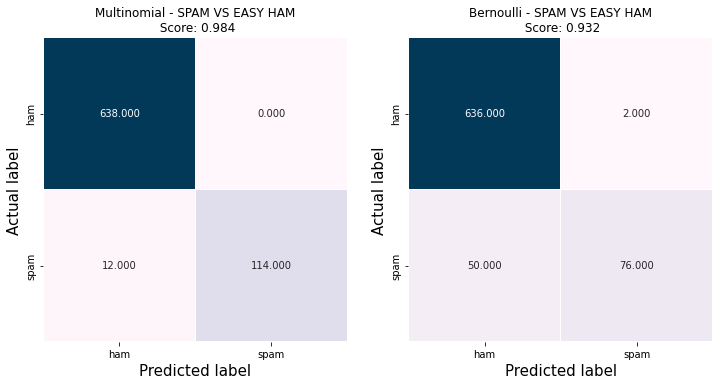


SPAM VS EASY HAM
			MULTINOMIAL	BERNOOULLI
Ham cl. as ham		100.0%		99.7%
Ham cl as spam		0.0%		0.3%
Spam cl. as spam	90.5%		60.3%
Spam cl as ham 		9.5%		39.7%




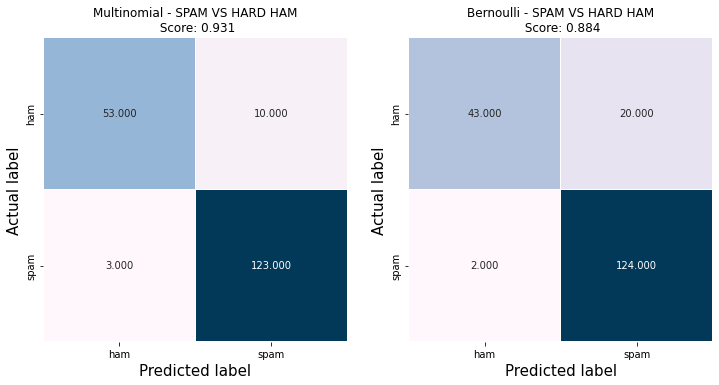


SPAM VS HARD HAM
			MULTINOMIAL	BERNOOULLI
Ham cl. as ham		84.1%		68.3%
Ham cl as spam		15.9%		31.7%
Spam cl. as spam	97.6%		98.4%
Spam cl as ham 		2.4%		1.6%




In [ ]:
score_MN_e,score_B_e,n_word=spam_MN_Bern(easy_hamtrain,spamtrain,easy_hamtest,spamtest,name='SPAM VS EASY HAM')
score_MN_h,score_B_h,n_word=spam_MN_Bern(hard_hamtrain,spamtrain,hard_hamtest,spamtest,name='SPAM VS HARD HAM')

### Discussion on results
#### Spam vs Easy ham
It can be seen from the results, that both methods performs very well classfying easy_ham as ham. Only 1 mail out of 638 was misclasssied in this category. 
Many of spams were classified as ham and especially for Bernoulli where 57% of the spam were misclassified as ham. One reason for these results could be the realtive size
of the data sets where the prior probability is higher for ham (1913 mails) than for spam (375 mails). This means that the _likelihood_ factor needs to be higher for 
the spam than for ham to be classified as spam. A reason for Multinomial NB performing better could be that the number of occurrences have high importance when 
the data is not cleaned (i.e. stop words removed etc.). However, this type of misclassification is more acceptable since it would, in most cases, be worse classifying ham as spam than vice verse.
#### Spam vs Hard ham
For these data set most misclassifications were ham misclassified as spam (which is a more crucial misclassfication). For Bernoulli as much as 40% of the ham 
were misclassified as spam. In these data sets the prior is higher for spam (375 mails) than for hard_ham (187 mails) which means that we now need higher likelihood for
hard_ham than for spam to be classfied as spam. Besides the diffuculty to differentiate ham from spam, this could be a reason for many ham mail misclassified as spam.

### 4.	To avoid classification based on common and uninformative words it is common to filter these out. 

**a.** Argue why this may be useful. Try finding the words that are too common/uncommon in the dataset. 

**b.** Use the parameters in Sklearn’s `CountVectorizer` to filter out these words. Update the program from point 3 and run it on your data and report your results.

You have two options to do this in Sklearn: either using the words found in part (a) or letting Sklearn do it for you. Argue for your decision-making.


### 4a
Besides reducing the size of the dataset and making computation more efficient, common/uncommon words that does not contain any information could be removed 
to reduce noise and increase the predictive power of the model. If the data contains many _uninformative_ words, the likilyhood factor will become very small and
deteriorate the resolution. By removing uninformative words, the remaining (more important) words will get higher weight.

When finding and removing words, we first define a preprocessor function to preprocess the mail. The preprocessor does the following:
1. Removing html code
2. Removing special characters - This way we can utilize words like xyz@hotmail.com as xyz, hotmail and com. Otherwize many of these words might be filtered out as uncommon words.
3. Removing numbers that are not part of a word as these are not considered to be useful.
4. Convert to lower case. Even if Countvectorizer does this per default it is useful when creating a common word vocabulary.

Below is the 20 most common words listed in all_mail. Also 20 example of words that only occur once are listed (there are approximately 54000 out of 90000 unique words). In 4b, a method of finding an appropriate vocabulary is discusses.

### Cleanup function (also used as preprocessor in CountVectorizer)

In [ ]:
#Removing
import re
def cleanup(set1):
    set1=re.sub(r"<.*?>",' ',set1) #remove html
    set1=re.sub(r"\W",' ',set1) #remove special characters
    set1=re.sub(r"\_",' ',set1) #remove special characters
    set1=re.sub(r"$\d+\W+|\b\d+\b|\W+\d+$",' ',set1) #remove numbers not part of a word
    set1=set1.lower()
    return set1

### Function to find common words

In [ ]:
from collections import Counter
#Find n most common words. If n=0 it finds all words.
def common(set_1,return_freq=False,n=-1):
    set_all=" ".join(set_1[:])   
    set_all=cleanup(set_all)
    split = set_all.split() 
    Counter1 = Counter(split)     
    if n==-1:
        most_occur = Counter1.most_common()
    else:
        most_occur = Counter1.most_common(n)
    n_words=len(most_occur)
    
    words=[most_occur[i][0] for i in range(n_words)]
    freq=[most_occur[i][1] for i in range(n_words)]
    if return_freq:
        return [words,freq]
    else:
        return words
        


### Finding common words

In [ ]:
words,freq = common(all_mail,return_freq=True)
n_print=20
n_once=freq.count(1)
print('Unique words: '+ str(len(freq))+'\n')
print('COMMON WORDS\tFREQ\t\t'+str(n_print)+ ' WORDS ONLY OCCURS ONCE (OUT OF '+str(n_once)+')')
for i in range(n_print):
    print('{0:16}{1:16}{2:30}'.format(words[i],str(freq[i]),words[-1-i]))



Unique words: 89982

COMMON WORDS	FREQ		20 WORDS ONLY OCCURS ONCE (OUT OF 54147)
the             40502           saa11649                      
to              38811           1cust249                      
com             36015           0c12543f99                    
from            30043           checkoutthesefreakhugecocksinapussy
for             23644           olhfilghxvuyfkfqbviqgacyenuuufpyswymlajxucqhpojagplujpmovuiaphwlqkkstgipemliwuugqptjukjklbjlgxqmuogtiwhhdlhjhkbucvbyqvgfp
with            22256           mailinin42                    
by              21376           d05                           
a               20543           44ad297                       
of              20188           saa27770                      
and             19838           g8hhsfc20442                  
id              18151           9e2f916f03                    
3d              18031           tc5lx1h8                      
received        17801           onz                           
x   

### 4b

Removing common words must be done with care. Lets say we use a method removing the 100 most common words of a train dataset. If the count is performed on
both classes together, it is possible that some common words belongs only to one of the classes, hence we would be removing valueble information.
On the other hand, if we count the common words separately, there could still be words that is only common in one of the classes and hence, risking 
removing valueble information. So instead, let us find the common words separately for both classes and filter out words that are present in both the classes. 
We define a parameter _n_, where the _n_ most common words are found for each class and then we removing words that are among the common words for both classes. The function for this is found below together with some in common words. Among the 100 most common words for each class, 65 were in common.

Using CountVectorizer built in function _max\_df_ should also be used with care. This removes words that is present in a certain proportion of the mails. It could 
be sensitive to the relative size of the classes. Lets say there is 85% ham and 15% spam in the train set and we set _max\_df_=0.85. Then we could , if unlucky,
 removing words only common in the ham set and hence removing valueble information.

 To remove uncommon words we use _min\_df_ which removes words present in a max proportion of mails. A very small number of _min\_df_ will efficiently remove most 
 uncommon words. As seen above 54000 out of 90000 words are only present once in the data set.

 To compare the method described above (parameter _n_) with _max\_df_ and find reasonalble values for these and _min\_df_, 2 different gridsearches 
 are done on these parameters.

 1. Gridsearch on _max\_df_ vs _min\_df_. Average of 10 iterations (with different random seed for train/test split) for each combnation.
 2. Gridsearch on _n_ vs _min\_df_. Average of 10 iterations (with different random seed for train/test split) for each combnation



### Function incommon (finding in common words of 2 datasets)

In [ ]:
from collections import Counter

#Finds the incommon words among the n most common words in 2 different data sets
def incommon(set1,set2,n): 
    most_occur1 = common(set1,n=n)
    most_occur2 = common(set2,n=n)
    match = []
    for i in most_occur1:
        if i in most_occur2:
            match.append(i)
    return match

spam_easy = incommon(spamtrain,easy_hamtrain,100)
spam_hard = incommon(spamtrain,hard_hamtrain,100)
print('Number of in common words spam vs ham_easy: '+str(len(spam_easy)))
print('Number of in common words spam vs ham_hard: '+str(len(spam_hard)))
print('\nCommon words in spam and easy_ham\tCommon words in spam and hard_ham')
for i in range(30):
    print('{0:40}{1:16}'.format(spam_easy[i],spam_hard[i]))





Number of in common words spam vs ham_easy: 65
Number of in common words spam vs ham_hard: 65

Common words in spam and easy_ham	Common words in spam and hard_ham
to                                      3d              
the                                     to              
from                                    the             
for                                     from            
you                                     for             
com                                     you             
and                                     com             
with                                    and             
by                                      with            
of                                      by              
a                                       of              
received                                a               
id                                      received        
localhost                               id              
sep                                    

### Grid search min\_df, max\_df

In [ ]:
## Optimizing max_df and min_df
max_df_val=np.array([.8,.85,.9,.99,1.0])
min_df_val=np.array([0,.001,.002,.003,.004,.005])
max_df_2d=np.zeros((len(max_df_val),len(min_df_val)))
min_df_2d=np.zeros((len(max_df_val),len(min_df_val)))
n_words=np.zeros((2,len(max_df_val),len(min_df_val)))
score2d=np.zeros((4,len(max_df_val),len(min_df_val)))
err2d=np.zeros((4,len(max_df_val),len(min_df_val)))
title=['Multinomial - spam vs easy ham','Bernoulli - spam vs easy ham','Multinomial - spam vs hard ham','Bernoulli - spam vs hard ham']

n_it=10
score=np.zeros((4,n_it))
word=np.zeros((2,n_it))

i=0
for max_df in max_df_val:
    j=0
    for min_df in min_df_val:
        for k in range(n_it):  ##### ITERATION FOR n_it DIFFERENT SEEDS
            easy_hamtrain, easy_hamtest = train_test_split(easy_ham, test_size = .25, random_state = k)
            hard_hamtrain, hard_hamtest = train_test_split(hard_ham, test_size = .25, random_state = k)
            spamtrain, spamtest = train_test_split(spam, test_size = .25, random_state = k)
            score[0,k],score[1,k],word[0,k]=spam_MN_Bern(easy_hamtrain,spamtrain,easy_hamtest,spamtest,max_df=max_df,min_df=min_df,cm_plot=False,preprocessor=cleanup)
            score[2,k],score[3,k],word[1,k]=spam_MN_Bern(hard_hamtrain,spamtrain,hard_hamtest,spamtest,max_df=max_df,min_df=min_df,cm_plot=False,preprocessor=cleanup)
        score2d[0,i,j],score2d[1,i,j]=np.mean(score[0,:]),np.mean(score[1,:])
        score2d[2,i,j],score2d[3,i,j]=np.mean(score[2,:]),np.mean(score[3,:])    
        err2d[0,i,j],err2d[1,i,j]=np.sqrt(np.var(score[1,:])),np.sqrt(np.var(score[2,:]))
        err2d[2,i,j],err2d[3,i,j]=np.sqrt(np.var(score[3,:])),np.sqrt(np.var(score[3,:]))
        max_df_2d[i,j]=max_df
        min_df_2d[i,j]=min_df
        n_words[0,i,j]=np.mean(word[0,:])
        n_words[1,i,j]=np.mean(word[1,:])
        j+=1
    i+=1
n_words[0,:,:]=n_words[0,-1,0]-n_words[0,:,:]
n_words[1,:,:]=n_words[1,-1,0]-n_words[1,:,:]



### Plotting result from grid search

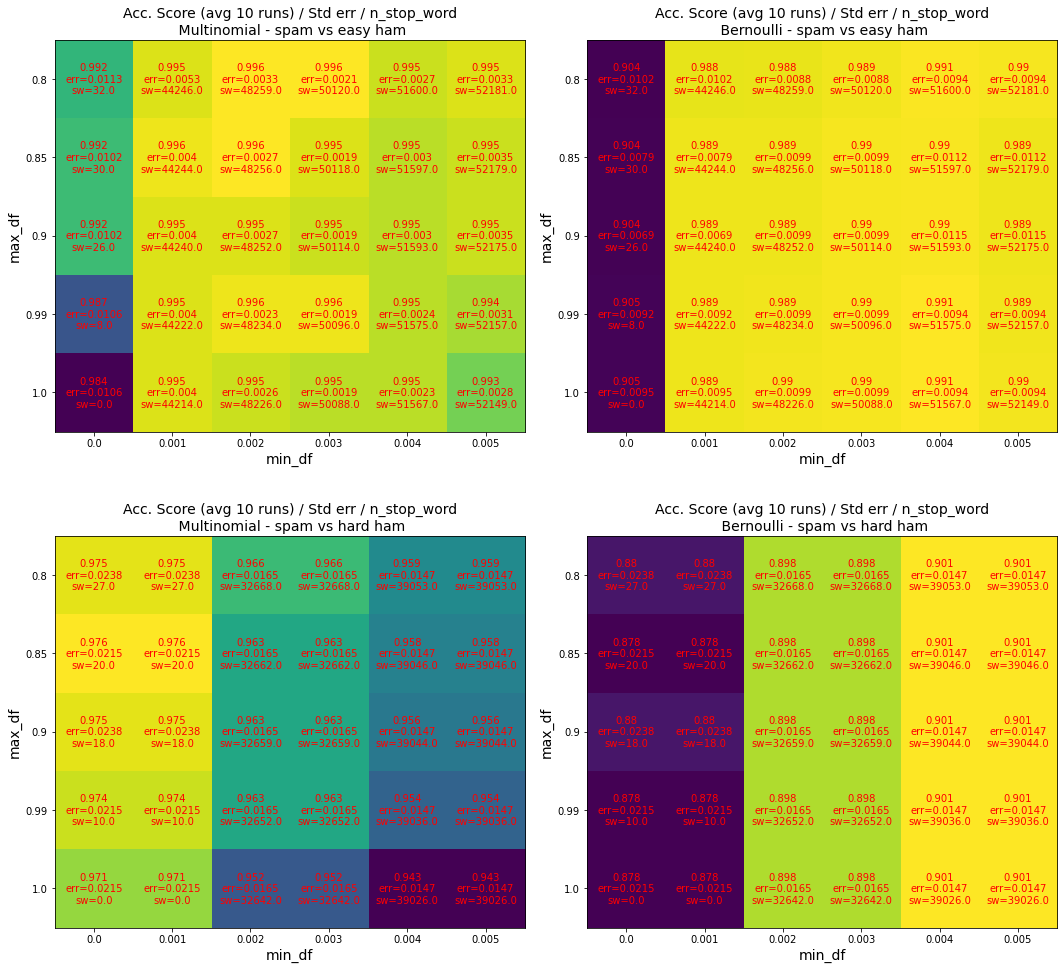

In [ ]:
#PLOTTING HEATMAP
fig1 = plt.figure(figsize=(15,15))
for k in range(4):
    fig1.add_subplot(2,2,k+1)
    im = plt.imshow(score2d[k,:,:])
    plt.xticks(np.arange(len(min_df_val)),min_df_val)
    plt.yticks(np.arange(len(max_df_val)),max_df_val)
    # Loop over data dimensions and create text annotations.
    for i in range(len(max_df_val)):
        for j in range(len(min_df_val)):
            text = plt.text(j, i, str(round(score2d[k,i,j],3))+'\nerr='+str(round(err2d[k,i,j],4))+'\nsw='+str(round(n_words[int(np.floor(k/2)),i,j])),ha="center", va="center", color="red",fontsize=10)
    plt.title('Acc. Score (avg 10 runs) / Std err / n_stop_word\n '+title[k],fontsize=14)
    plt.ylabel("max_df",fontsize=14)
    plt.xlabel("min_df",fontsize=14)
    fig1.tight_layout(pad=1.5)

### Grid search min\_df, n

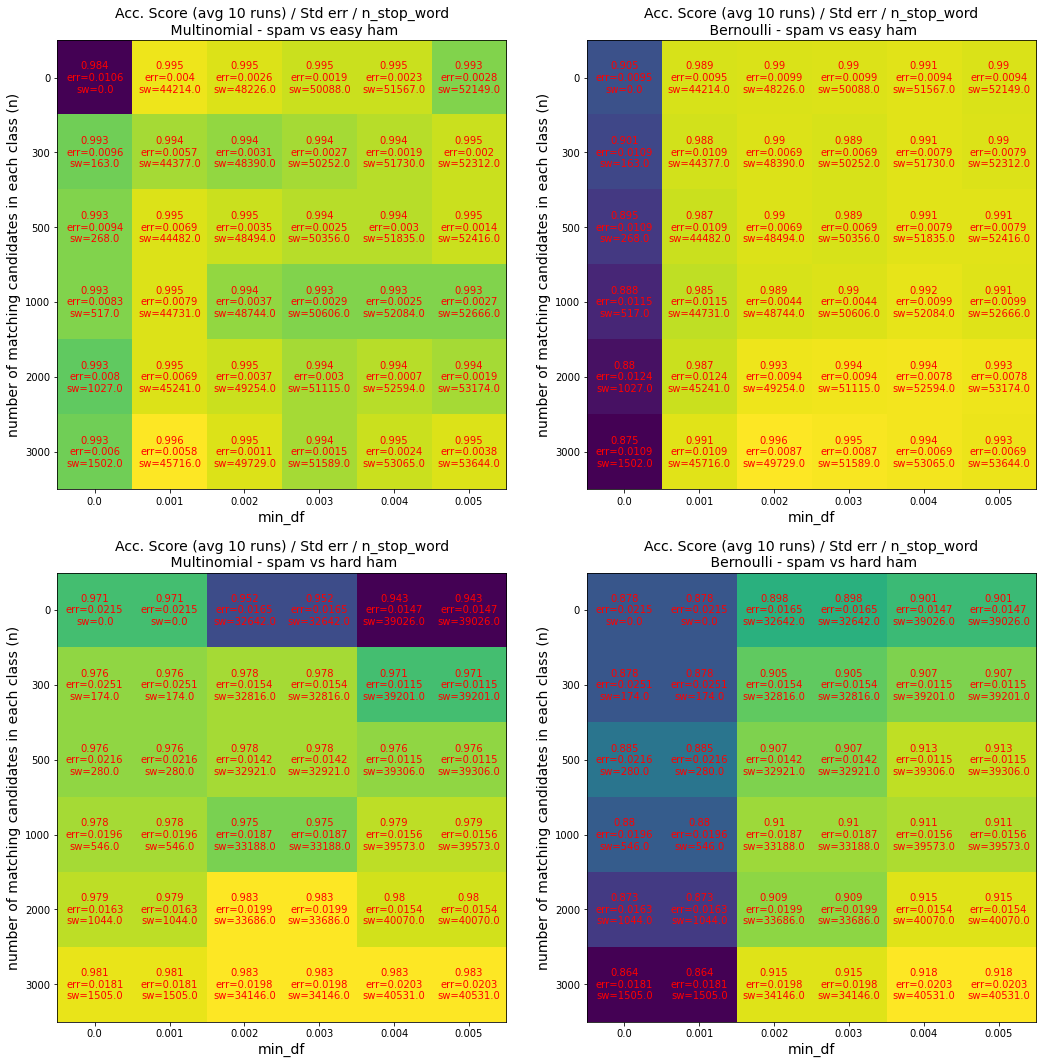

In [ ]:
## Optimizing n common words and min_df
n_val=np.array([0,300,500,1000,2000,3000])
min_df_val=np.array([0,.001,.002,.003,.004,.005])
n_2d=np.zeros((len(n_val),len(min_df_val)))
min_df_2d=np.zeros((len(n_val),len(min_df_val)))
n_words=np.zeros((2,len(n_val),len(min_df_val)))
score2d=np.zeros((4,len(n_val),len(min_df_val)))
err2d=np.zeros((4,len(n_val),len(min_df_val)))
title=['Multinomial - spam vs easy ham','Bernoulli - spam vs easy ham','Multinomial - spam vs hard ham','Bernoulli - spam vs hard ham']

n_it=10
score=np.zeros((4,n_it))
word=np.zeros((2,n_it))

i=0
for n in n_val:
    j=0
    for min_df in min_df_val:
        for k in range(n_it): ##### ITERATION FOR n_it DIFFERENT SEEDS
            easy_hamtrain, easy_hamtest = train_test_split(easy_ham, test_size = .25, random_state = k)
            hard_hamtrain, hard_hamtest = train_test_split(hard_ham, test_size = .25, random_state = k)
            spamtrain, spamtest = train_test_split(spam, test_size = .25, random_state = k)
            match_spam_easy=incommon(easy_hamtrain,spamtrain,n) ######### ESTABLISHING VOCABULARY FOR STOP WORDS
            match_spam_hard=incommon(hard_hamtrain,spamtrain,n) ######### ESTABLISHING VOCABULARY FOR STOP WORDS
            score[0,k],score[1,k],word[0,k]=spam_MN_Bern(easy_hamtrain,spamtrain,easy_hamtest,spamtest,stop_words=match_spam_easy,min_df=min_df,cm_plot=False,preprocessor=cleanup)
            score[2,k],score[3,k],word[1,k]=spam_MN_Bern(hard_hamtrain,spamtrain,hard_hamtest,spamtest,stop_words=match_spam_hard,min_df=min_df,cm_plot=False,preprocessor=cleanup)
        score2d[0,i,j],score2d[1,i,j]=np.mean(score[0,:]),np.mean(score[1,:])
        score2d[2,i,j],score2d[3,i,j]=np.mean(score[2,:]),np.mean(score[3,:])    
        err2d[0,i,j],err2d[1,i,j]=np.sqrt(np.var(score[1,:])),np.sqrt(np.var(score[2,:]))
        err2d[2,i,j],err2d[3,i,j]=np.sqrt(np.var(score[3,:])),np.sqrt(np.var(score[3,:]))
        n_2d[i,j]=n
        min_df_2d[i,j]=min_df
        n_words[0,i,j]=np.mean(word[0,:])
        n_words[1,i,j]=np.mean(word[1,:])
        j+=1
    i+=1
n_words[0,:,:]=n_words[0,0,0]-n_words[0,:,:]
n_words[1,:,:]=n_words[1,0,0]-n_words[1,:,:]


#PLOTTING HEATMAP
fig1 = plt.figure(figsize=(15,15))
for k in range(4):
    fig1.add_subplot(2,2,k+1)
    im = plt.imshow(score2d[k,:,:])
    plt.xticks(np.arange(len(min_df_val)),min_df_val)
    plt.yticks(np.arange(len(n_val)),n_val)
    # Loop over data dimensions and create text annotations.
    for i in range(len(n_val)):
        for j in range(len(min_df_val)):
            text = plt.text(j, i, str(round(score2d[k,i,j],3))+'\nerr='+str(round(err2d[k,i,j],4))+'\nsw='+str(round(n_words[int(np.floor(k/2)),i,j])),ha="center", va="center", color="red",fontsize=10)
    plt.title('Acc. Score (avg 10 runs) / Std err / n_stop_word\n '+title[k],fontsize=14)
    plt.ylabel("number of matching candidates in each class (n)",fontsize=14)
    plt.xlabel("min_df",fontsize=14)
    fig1.tight_layout(pad=1.5)
    


The plots above show the accuracy score for different parameter value. It can also be seen that, as expected, many (unique) uncommon words are removed (first row in the plots) but not 
that many (unique) common words (first column in the plots). It can also be noticed that the standard errors are substantially higher for spam\_vs\_hard ham. This is expected due to smaller data sets and the fact that they are harder to classify which makes the model more vulnerable to random effects.
The _n_-method generally performs better than _max\_df_. One set of parameters for both Multinomial and Bernoulli are choosen 
based on the gridsearches. The results for _n_=3000 and _min\_df_ = 0.002 and with seed=0 (same as in Question 3) are shown below.

The result for the optimized model was improved substantially. The detailed results are shown in the output below: 

Comparison between the accuracy scores:
- Multinomial spam vs easy ham: 98.4% --> 100%
- Bernoulli spam vs easy ham: 93.2% --> 99.6%
- Multinomial spam vs hard ham: 93.1% --> 98.9%
- Bernoulli spam vs hard ham: 88.4% --> 89.4%

The results are close to perfect except for Bernoolli that classifies 28.6% of ham as spam. A reason for this could be that Multinomial are a refined model taking the word count into account. This could be crucial when the spam and ham mail are harder to distinguish.


### Running classifiers with selected values from grid search and seed = 0

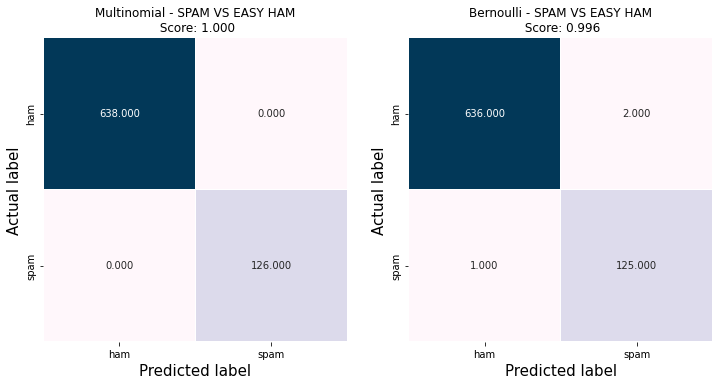


SPAM VS EASY HAM
			MULTINOMIAL	BERNOOULLI
Ham cl. as ham		100.0%		99.7%
Ham cl as spam		0.0%		0.3%
Spam cl. as spam	100.0%		99.2%
Spam cl as ham 		0.0%		0.8%




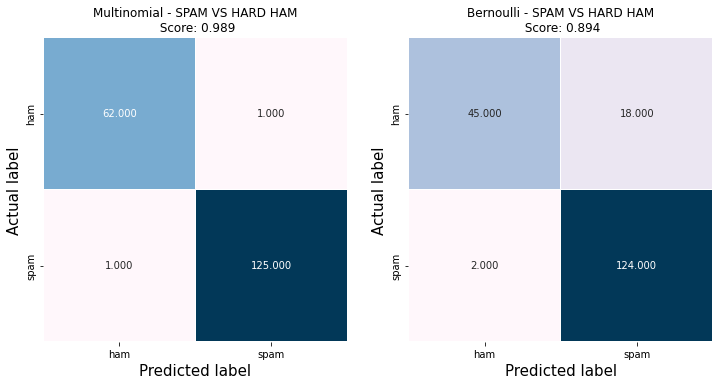


SPAM VS HARD HAM
			MULTINOMIAL	BERNOOULLI
Ham cl. as ham		98.4%		71.4%
Ham cl as spam		1.6%		28.6%
Spam cl. as spam	99.2%		98.4%
Spam cl as ham 		0.8%		1.6%




In [ ]:
easy_hamtrain, easy_hamtest = train_test_split(easy_ham, test_size = .25, random_state = 0)
hard_hamtrain, hard_hamtest = train_test_split(hard_ham, test_size = .25, random_state = 0)
spamtrain, spamtest = train_test_split(spam, test_size = .25, random_state = 0)
match_spam_easy=incommon(easy_hamtrain,spamtrain,3000)
match_spam_hard=incommon(hard_hamtrain,spamtrain,3000)
score_MN_e,score_B_e,x=spam_MN_Bern(easy_hamtrain,spamtrain,easy_hamtest,spamtest,stop_words=match_spam_easy,min_df=.002,cm_plot=True,preprocessor=cleanup,name='SPAM VS EASY HAM')
score_MN_h,score_B_h,x=spam_MN_Bern(hard_hamtrain,spamtrain,hard_hamtest,spamtest,stop_words=match_spam_hard,min_df=.002,cm_plot=True,preprocessor=cleanup,name='SPAM VS HARD HAM')

### 5. Eeking out further performance
Filter out the headers and footers of the emails before you run on them. The format may vary somewhat between emails, which can make this a bit tricky, so perfect filtering is not required. Run your program again and answer the following questions: 
-	Does the result improve from 3 and 4? 
- The split of the data set into a training set and a test set can lead to very skewed results. Why is this, and do you have suggestions on remedies? 
- What do you expect would happen if your training set were mostly spam messages while your test set were mostly ham messages? 

Re-estimate your classifier using `fit_prior` parameter set to `false`, and answer the following questions:
- What does this parameter mean?
- How does this alter the predictions? Discuss why or why not.

## Discussion
#### Filter algorithm
1. Extract lines containing "From:" and "Subject:" as these can be valueble for classification.
2. Using python _email_ package, to get body of the mail.
3. Add the lines extracted in 1.
4. Word cleaning procedure same as before.

As we now have a different model setup, the parameter study needs to be rerun to have a fair comparison between the models.

### E-mail head/footer filter function

In [ ]:
# Function to get body of the mail

import email

def parse_multipart_message (m) :
    pm  = ''
    for i in m :
        if i.is_multipart() : 
            pm += parse_multipart_message(i.get_payload())
        else :
            pm += i.get_payload()
    return pm


# Remove html tags
def remove_html_markup(s):
    tag = False
    quote = False
    out = ""
    for c in s:
            if c == '<' and not quote:
                tag = True
            elif c == '>' and not quote:
                tag = False
            elif (c == '"' or c == "'") and tag:
                quote = not quote
            elif not tag:
                out = out + c
    return out

def clean_email (m) :
    parsed_mail = ''
    if m.is_multipart():
        parsed_mail += parse_multipart_message(m.get_payload())
    else:
        parsed_mail += m.get_payload()
    parsed_mail = remove_html_markup(parsed_mail)
    parsed_mail = str(parsed_mail).replace('&nbsp;','')
    parsed_mail = str(parsed_mail).replace('&#149;','')    
    lines = parsed_mail.split('\n')
    non_empty_lines = [line for line in lines if line.strip() != ""]
    parsed_mail = ''
    for line in non_empty_lines:
      parsed_mail += line + "\n"
    parsed_mail = parsed_mail + str(m["from"]) + '\n' + str(m["subject"])
    return parsed_mail

def clean_email_list (ml) :
    cml = []
    for i in range (len(ml)) :
        message = email.message_from_string(ml[i])
        cml.append(clean_email(message))
    return cml



### Rerun grid search w.r.t. min\_df and n

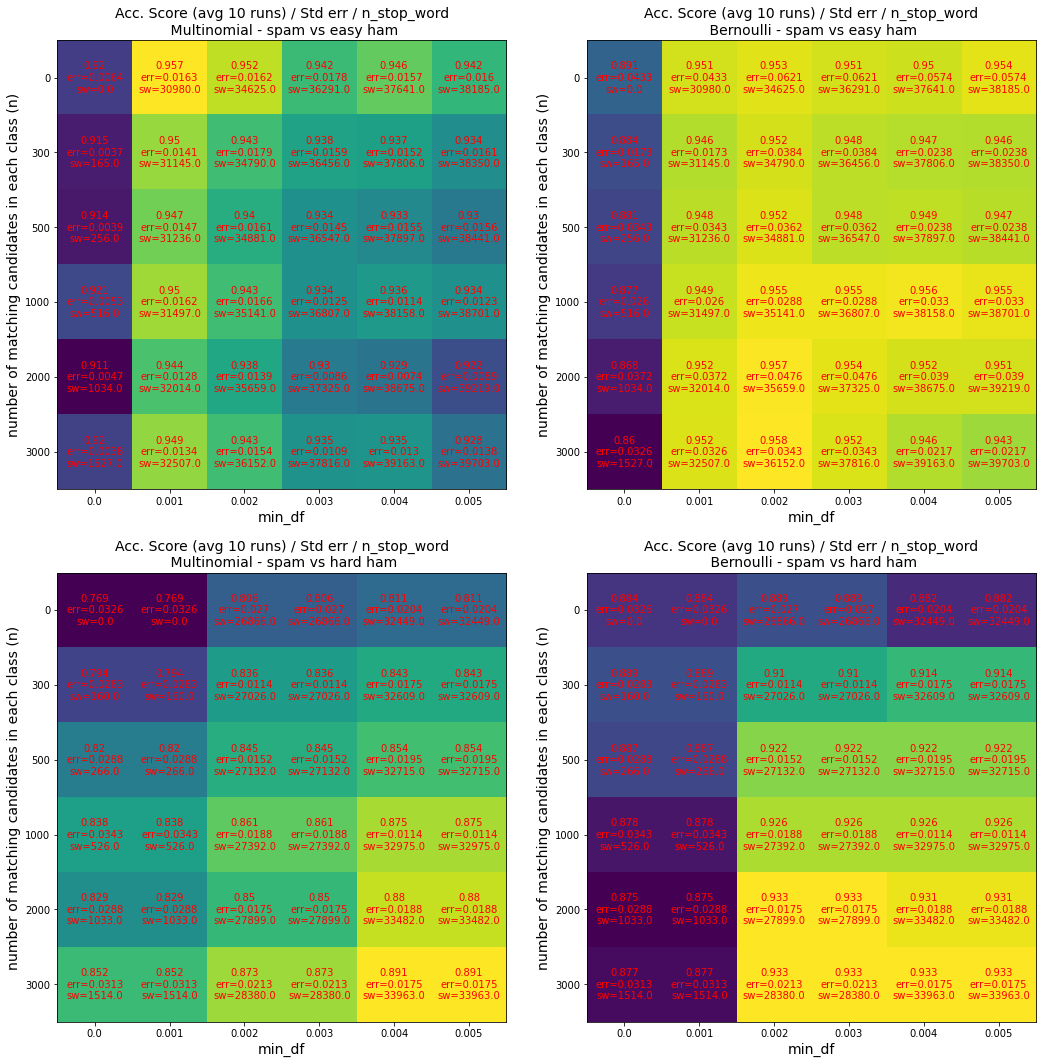

In [ ]:
## Optimizing n common words and min_df
n_val=np.array([0,300,500,1000,2000,3000])
min_df_val=np.array([0,.001,.002,.003,.004,.005])
#n_val=np.array([0,300])
#min_df_val=np.array([0,.001])
n_2d=np.zeros((len(n_val),len(min_df_val)))
min_df_2d=np.zeros((len(n_val),len(min_df_val)))
n_words=np.zeros((2,len(n_val),len(min_df_val)))
score2d=np.zeros((4,len(n_val),len(min_df_val)))
err2d=np.zeros((4,len(n_val),len(min_df_val)))
title=['Multinomial - spam vs easy ham','Bernoulli - spam vs easy ham','Multinomial - spam vs hard ham','Bernoulli - spam vs hard ham']

n_it=10
score=np.zeros((4,n_it))
word=np.zeros((2,n_it))

i=0
for n in n_val:
    j=0
    for min_df in min_df_val:
        for k in range(n_it):  ##### ITERATION FOR n_it DIFFERENT SEEDS
            easy_hamtrain, easy_hamtest = train_test_split(easy_ham, test_size = .25, random_state = k)
            hard_hamtrain, hard_hamtest = train_test_split(hard_ham, test_size = .25, random_state = k)
            spamtrain, spamtest = train_test_split(spam, test_size = .25, random_state = k)
            easy_hamtrain=clean_email_list(easy_hamtrain) ######### HEADER/FOOTER FILTERING
            hard_hamtrain=clean_email_list(hard_hamtrain) ######### HEADER/FOOTER FILTERING
            spamtrain=clean_email_list(spamtrain) ######### HEADER/FOOTER FILTERING
            match_spam_easy=incommon(easy_hamtrain,spamtrain,n) ######### ESTABLISHING VOCABULARY FOR STOP WORDS
            match_spam_hard=incommon(hard_hamtrain,spamtrain,n) ######### ESTABLISHING VOCABULARY FOR STOP WORDS
            score[0,k],score[1,k],word[0,k]=spam_MN_Bern(easy_hamtrain,spamtrain,easy_hamtest,spamtest,stop_words=match_spam_easy,min_df=min_df,cm_plot=False,preprocessor=cleanup)
            score[2,k],score[3,k],word[1,k]=spam_MN_Bern(hard_hamtrain,spamtrain,hard_hamtest,spamtest,stop_words=match_spam_hard,min_df=min_df,cm_plot=False,preprocessor=cleanup)
        score2d[0,i,j],score2d[1,i,j]=np.mean(score[0,:]),np.mean(score[1,:])
        score2d[2,i,j],score2d[3,i,j]=np.mean(score[2,:]),np.mean(score[3,:])    
        err2d[0,i,j],err2d[1,i,j]=np.sqrt(np.var(score[1,:])),np.sqrt(np.var(score[2,:]))
        err2d[2,i,j],err2d[3,i,j]=np.sqrt(np.var(score[3,:])),np.sqrt(np.var(score[3,:]))
        n_2d[i,j]=n
        min_df_2d[i,j]=min_df
        n_words[0,i,j]=np.mean(word[0,:])
        n_words[1,i,j]=np.mean(word[1,:])
        j+=1
    i+=1
n_words[0,:,:]=n_words[0,0,0]-n_words[0,:,:]
n_words[1,:,:]=n_words[1,0,0]-n_words[1,:,:]


#PLOTTING HEATMAP
fig1 = plt.figure(figsize=(15,15))
for k in range(4):
    fig1.add_subplot(2,2,k+1)
    im = plt.imshow(score2d[k,:,:])
    plt.xticks(np.arange(len(min_df_val)),min_df_val)
    plt.yticks(np.arange(len(n_val)),n_val)
    # Loop over data dimensions and create text annotations.
    for i in range(len(n_val)):
        for j in range(len(min_df_val)):
            text = plt.text(j, i, str(round(score2d[k,i,j],3))+'\nerr='+str(round(err2d[k,i,j],4))+'\nsw='+str(round(n_words[int(np.floor(k/2)),i,j])),ha="center", va="center", color="red",fontsize=10)
    plt.title('Acc. Score (avg 10 runs) / Std err / n_stop_word\n '+title[k],fontsize=14)
    plt.ylabel("number of matching candidates in each class (n)",fontsize=14)
    plt.xlabel("min_df",fontsize=14)
    fig1.tight_layout(pad=1.5)

### Running classifier with values choosen from grid search (min\_df=0.002, n=1000, seed =0)

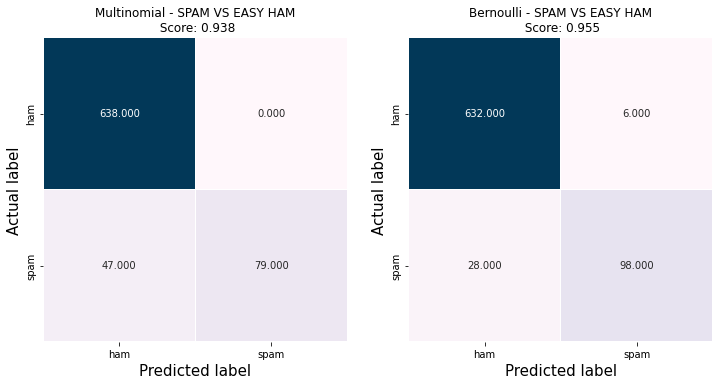


SPAM VS EASY HAM
			MULTINOMIAL	BERNOOULLI
Ham cl. as ham		100.0%		99.1%
Ham cl as spam		0.0%		0.9%
Spam cl. as spam	62.7%		77.8%
Spam cl as ham 		37.3%		22.2%




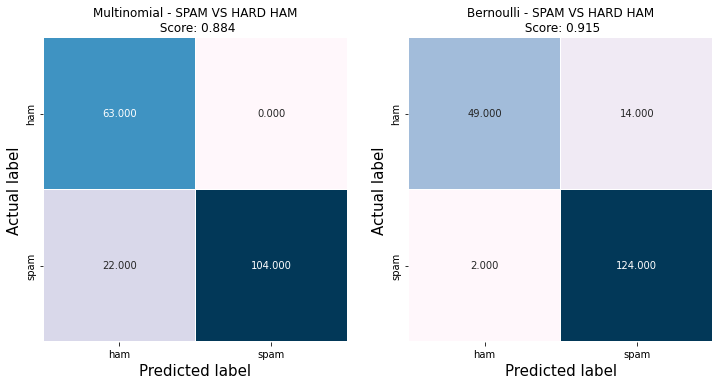


SPAM VS HARD HAM
			MULTINOMIAL	BERNOOULLI
Ham cl. as ham		100.0%		77.8%
Ham cl as spam		0.0%		22.2%
Spam cl. as spam	82.5%		98.4%
Spam cl as ham 		17.5%		1.6%




In [ ]:
easy_hamtrain, easy_hamtest = train_test_split(easy_ham, test_size = .25, random_state = 0)
hard_hamtrain, hard_hamtest = train_test_split(hard_ham, test_size = .25, random_state = 0)
spamtrain, spamtest = train_test_split(spam, test_size = .25, random_state = 0)
easy_hamtrain=clean_email_list(easy_hamtrain) ######### HEADER/FOOTER FILTERING
hard_hamtrain=clean_email_list(hard_hamtrain) ######### HEADER/FOOTER FILTERING
spamtrain=clean_email_list(spamtrain) ######### HEADER/FOOTER FILTERING
match_spam_easy=incommon(easy_hamtrain,spamtrain,1000) ######### ESTABLISHING VOCABULARY FOR STOP WORDS
match_spam_hard=incommon(hard_hamtrain,spamtrain,1000) ######### ESTABLISHING VOCABULARY FOR STOP WORDS
score_MN_e,score_B_e,x=spam_MN_Bern(easy_hamtrain,spamtrain,easy_hamtest,spamtest,stop_words=match_spam_easy,min_df=.002,cm_plot=True,preprocessor=cleanup,name='SPAM VS EASY HAM')
score_MN_h,score_B_h,x=spam_MN_Bern(hard_hamtrain,spamtrain,hard_hamtest,spamtest,stop_words=match_spam_hard,min_df=.002,cm_plot=True,preprocessor=cleanup,name='SPAM VS HARD HAM')

### Does the result improve from 3 and 4? 

The result with the header/footer filtering were substantially worsen.

Comparison between the accuracy scores:

                              No clean --> Word clean --> Filter header/footer
- Multinomial spam vs easy ham: 98.4% --> 100% --> 93.8%
- Bernoulli spam vs easy ham: 93.2% --> 99.6% --> 95.5%
- Multinomial spam vs hard ham: 93.1% --> 98.9% --> 88.4%
- Bernoulli spam vs hard ham: 88.4% --> 89.4% --> 91.5%

A reason for this result could be that the header and footer contains much valuable information for the classification.


### The split of the data set into a training set and a test set can lead to very skewed results. Why is this, and do you have suggestions on remedies? 

If the data set is split randomly together for both classes, the proportion between the classes could differ substantially in test and train. This could lead to a an _incorrect_ prior which is based on the proportion between classes in the train set. For example, if there are very few ham mails in the train set, it would require the likelyhood factor (in Bayes formula) for ham to be higher than for spam in order to be classified as ham. This is discussed more in detail in Fit\_prior-section below. To avoid this, the data can be split for each class individually. Then the proportion would be the same in train and test for both classes. 

### What do you expect would happen if your training set were mostly spam messages while your test set were mostly ham messages? 

If there mostly spam messages in the train set, the _prior_ probability would be high for spam and low for ham. Then, the likilyhood factor in 
Bayes formula would need to be high to in order for a mail to be classfied as ham. Hence, most ham mails in the test set would lead to high rate of misclassification for ham. 

#### Fit_prior = False
When using _fit prior_, the prior probility belonging to a certain class, with the mail unseen, is taken into account. In our case, the prior means the probability 
of belonging to a class before the content of the has not yet been seen. For example if our train data set consist of 1 million hams and only 10 spams, we could 
almost certainly say that a given _unseen_ mail is a ham without looking at the content. The prior probility for ham would be much higher than for spam. This 
is taken into account by factor when computing the _posterior_ (or in fact a number proportional to the posterior) for the mail. In practice this means that it would require more proof for a mail to be classified
as spam then ham.

The prior could in general be based on any prior knowledge about the dataset but in the algorithm this is related to the proportion of 
ham and spam in the train data set.
By removing fit\_prior it is expected to change the result in favour of the least common class, i.e. more mails will be classified as spam vs easy_ham 
(n\_spam < n\_easy_ham) and more mail will be classified as hard_ham vs spam (n\_spam > n\_hard_ham).

To illustrate another example of the meaning of prior, we could consider an HIV-test of a random person. If the test turns out to be positive, it is still very 
likely that the person in fact is HIV-negative, given that it is an extremly rare disease, i.e. it is more likely that the test is incorrect than the person in fact is positive. However, if there are strong reasons to believe that the person are HIV-positive (i.e. the prior is different), then the probability of a
true positive test increases.

The header/footer filtered model is now re-estimated with fit\_prior=False. 


### Header/footer filered model with fit\_prior = False

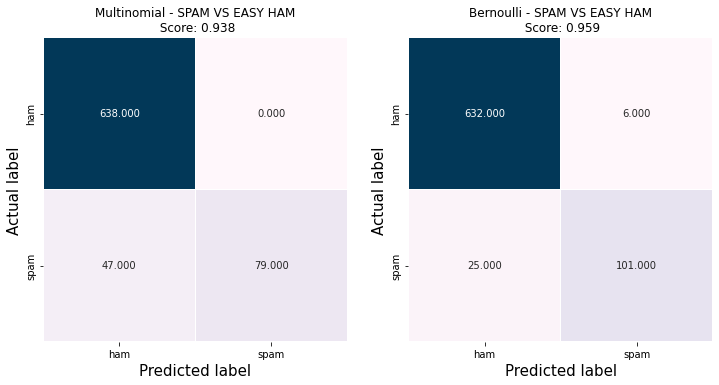


SPAM VS EASY HAM
			MULTINOMIAL	BERNOOULLI
Ham cl. as ham		100.0%		99.1%
Ham cl as spam		0.0%		0.9%
Spam cl. as spam	62.7%		80.2%
Spam cl as ham 		37.3%		19.8%




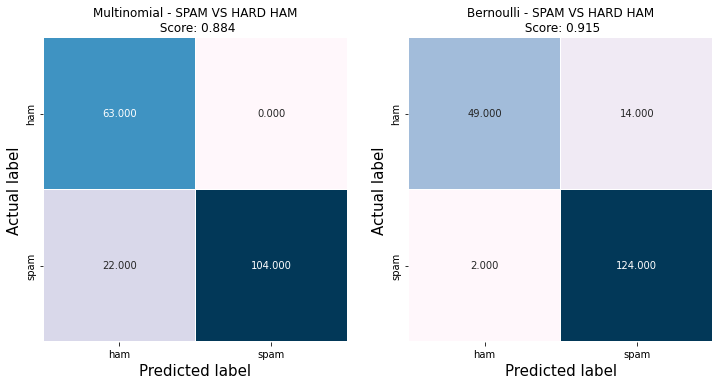


SPAM VS HARD HAM
			MULTINOMIAL	BERNOOULLI
Ham cl. as ham		100.0%		77.8%
Ham cl as spam		0.0%		22.2%
Spam cl. as spam	82.5%		98.4%
Spam cl as ham 		17.5%		1.6%




In [ ]:
easy_hamtrain, easy_hamtest = train_test_split(easy_ham, test_size = .25, random_state = 0)
hard_hamtrain, hard_hamtest = train_test_split(hard_ham, test_size = .25, random_state = 0)
spamtrain, spamtest = train_test_split(spam, test_size = .25, random_state = 0)
easy_hamtrain=clean_email_list(easy_hamtrain) ######### HEADER/FOOTER FILTERING
hard_hamtrain=clean_email_list(hard_hamtrain) ######### HEADER/FOOTER FILTERING
spamtrain=clean_email_list(spamtrain) ######### HEADER/FOOTER FILTERING
match_spam_easy=incommon(easy_hamtrain,spamtrain,1000) ######### ESTABLISHING VOCABULARY FOR STOP WORDS
match_spam_hard=incommon(hard_hamtrain,spamtrain,1000) ######### ESTABLISHING VOCABULARY FOR STOP WORDS
score_MN_e,score_B_e,x=spam_MN_Bern(easy_hamtrain,spamtrain,easy_hamtest,spamtest,stop_words=match_spam_easy,min_df=.002,cm_plot=True,preprocessor=cleanup,name='SPAM VS EASY HAM',fit_prior=False)
score_MN_h,score_B_h,x=spam_MN_Bern(hard_hamtrain,spamtrain,hard_hamtest,spamtest,stop_words=match_spam_hard,min_df=.002,cm_plot=True,preprocessor=cleanup,name='SPAM VS HARD HAM',fit_prior=False)

Comparison between the accuracy scores:
- Multinomial spam vs easy ham:  93.8% --> 93.8%
- Bernoulli spam vs easy ham:  95.5% --> 95.9%
- Multinomial spam vs hard ham: 88.4% --> 88.4%
- Bernoulli spam vs hard ham:  91.5% --> 91.5%

The results are almost identical. However, it could be noticed that more mails are classified as spam for Bernoulli spam vs easy\_ham with fit\_prior=False (107 instead of 104). The diffrences are very small which makes it difficult to draw any conclusions, but it is reasonable that the number of predicted spams increases for spam vs easy ham with fit\_prior=False (since the prior would support ham predictions).

### What to report and how to hand in.

- You will need to clearly report all results in the notebook in a clear and appropriate way, either using plots or code output (f.x. "print statements"). 
- The notebook must be reproducible, that means, we must be able to use the `Run all` function from the `Runtime` menu and reproduce all your results. **Please check this before handing in.** 
- Save the notebook and share a link to the notebook (Press share in upper left corner, and use `Get link` option. **Please make sure to allow all with the link to open and edit.**
- Edits made after submission deadline will be ignored, graders will recover the last saved version before deadline from the revisions history.
- **Please make sure all cells are executed and all the output is clearly readable/visible to anybody opening the notebook.**